## Feature Engineering


*   The fourth project is the development of a notebook (code + explanation) that successfully engineers 12 unique types of features, **three** for each type of feature engineering: **transforming**, **interacting**, **mapping**, and **extracting**.
* The second part of the assignment is the development of a **deep learning classification** model to predict the direction of the S&P500 for the dates **2018-01-01—2018-07-12** (test set).
* The feature engineering section is unrelated to the model section, you can develop any features, not just features that would work for deep learning models (later on you can decide which features to use in your model).
*  You also have to uncomment all the example features and make them run successfully  → **every** feature example has some error/s that you have to fix. Please also describe the error you fixed!
*   Note that we *won't* be attempting to measure the quality of every feature (i.e., how much it improves the model), that is slightly too advanced for this course.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

Preparing the Data

In [2]:
# preparing our data
raw_prices = pd.read_csv("https://open-data.s3.filebase.com/assetalloc.csv", sep=';', parse_dates=True, index_col='Dates', dayfirst=True)
df = raw_prices.sort_values(by='Dates')
df["target"] = df["SP500"].pct_change().shift(-1)
df["target"] = np.where(df["target"]>0,1,0)
df.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,target
Dates,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67,0
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,1
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,0
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,1
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,0


**EDA**

In [3]:
df.describe()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,target
count,7682.000000,7682.000000,7682.000000,7682.000000,7682.000000,7682.000000,7682.000000,7682.000000,7682.000000,7682.000000,7682.000000,7682.000000,7682.000000,7682.000000,7682.000000,7682.000000,7682.000000,7682.000000
mean,4963.027135,2676.173213,1158.608469,699.251304,103.851192,125.639842,139.493888,170.176966,114.683909,126.287628,125.313396,133.803908,607.680260,151.079944,2865.501070,628.805674,333.979130,0.517574
std,1542.440297,1093.593906,588.816044,456.205247,4.651301,18.055983,32.718964,59.922221,8.245838,16.734645,16.605920,21.411653,363.377082,48.682885,1157.500615,315.914953,95.804692,0.499724
min,1990.200000,818.500000,287.110000,252.850000,89.925000,91.211000,88.147000,80.873000,98.684000,97.479000,97.361000,96.579000,118.820000,76.890000,1093.520000,133.584000,205.620000,0.000000
25%,3727.525000,1637.457500,657.795000,350.775000,101.253750,112.337750,118.374000,124.697750,108.046000,112.711250,112.618000,117.291000,333.782500,112.041500,1933.072500,348.189250,250.762500,0.000000
50%,5290.915000,2795.350000,1149.775000,400.350000,104.839000,125.603000,134.802500,160.969000,112.918000,120.744000,120.574000,130.331000,510.550000,138.530000,2696.885000,513.179500,294.740000,1.000000
75%,6210.170000,3448.370250,1417.252500,1178.305000,107.470000,140.479250,153.394000,195.394250,124.067500,143.552500,139.496500,146.128750,793.025000,188.859500,3412.010000,952.422000,422.370000,1.000000
max,7877.450000,5464.430000,2872.870000,1898.250000,111.218000,157.860000,217.376000,345.245000,126.921000,156.652000,163.328000,195.414000,1706.990000,279.741000,6048.960000,1338.487000,580.490000,1.000000


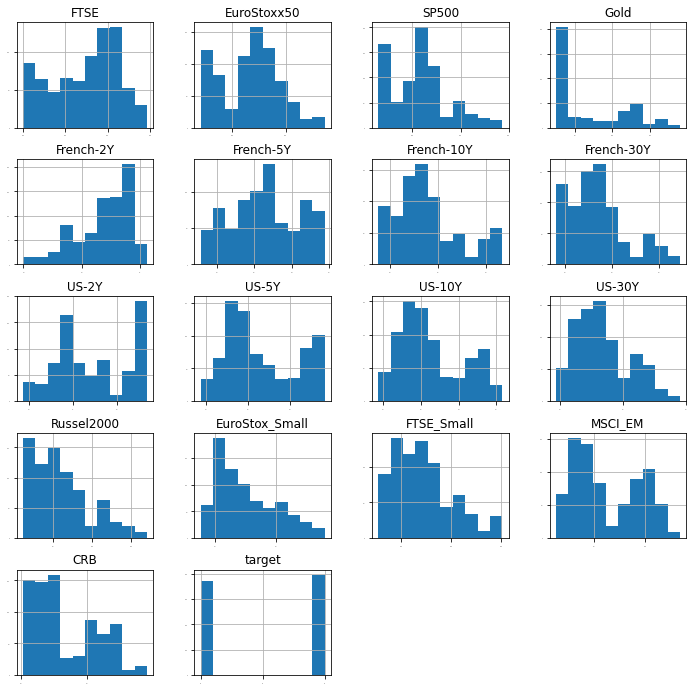

In [4]:
# histograms
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

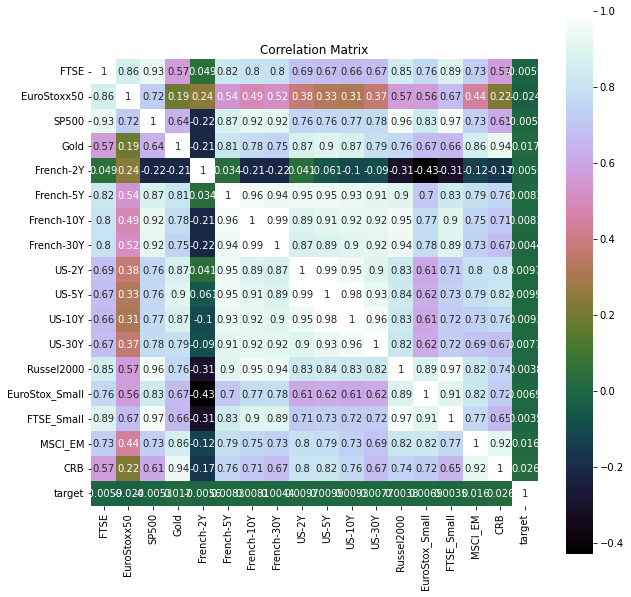

In [5]:
# correlation
correlation = df.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
y = df.pop("target")
X = df.copy()

X_train = X[X.index.astype(str)<'2018-01-01']
y_train = y[X_train.index]
X_test = X[~X.index.isin(X_train.index)]
y_test = y[X_test.index]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Transforming

1. Refresh your mind on tranformation methods by going back to the material. I am simply providing 1 example here. 
1. Don't repeat my logarithmic return calculation, develop your own transformation (there are 1000s of types of transformations).
1. In the example I provide, there is also an error that you have to fix. For example, one of the errors below is that you should actually use `np.log1p()`, but there is another one, so watch out! 

In [7]:
# Example Transforming (has errors) 

# Name: Logarithmic return of FTSE 
# Description: Developing the logarithmic return feature for use within linear models that make normality assumptions. 
# In this example transforming, the first error I fixed is changing "np.log" to "np.log1p". 
# Because np.log1p(x) equals to np.log(1+x), the logarithmic return is calculated as log(1+return)
# The second error is to drop nan for the first row.
df["FTSE_log"] = np.log1p(df["FTSE"].pct_change())
df = df.dropna()

In [8]:
## Transforming 1 (Add code below)
# Name: min-max scaler
# Description: min-max scaler is a method of transforming, to transform initial minimum to 0 and maximum to 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train.fillna(0))
X_test_mm = scaler.transform(X_test.fillna(0))

In [9]:
## Transforming 2 (Add code below)
# Name: max-abs scaler
# Description: Maximum absolute scaling scales the data to its maximum value; that is, it divides every observation by the maximum value of the variable.
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_train_ma = scaler.fit_transform(X_train.fillna(0))
X_test_ma = scaler.transform(X_test.fillna(0))

In [10]:
## Transforming 3 (Add code below)
# Name :Standardization
# Description: Standardization is the transformation of features by subtracting from mean and dividing by standard deviation.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.fillna(0))
X_test_s = scaler.transform(X_test.fillna(0))

### Interacting

There are millions of possible interaction methods, be creative and come up with your own. For this assignment there is no 'right' feature engineering method, you simply develop one, and give it a name and a discreption.

In [11]:
# Example Interacting (has errors) 

# Name: Ratio of Gold return to 10Y treasury
# Desciption: Both gold and treasuries are safe-haven assets and descrepency in their ratio could be a sign of some marco-economic event.
# In this example, the gold return should add pct_change() to calculate the return.
# And for some dates that prices of US-10Y or Gold may not change, which leads to a NAN or INF number, these numbers will be filled later in the PCA part.
def gold_to_yield(df):
  teny_returns = df["US-10Y"].pct_change()
  gold_returns = df["Gold"].pct_change()
  df["gold_r__div__teny_r"] = gold_returns/teny_returns
  return df

# X_train = gold_to_yield(X_train); X_test = gold_to_yield(X_test)
X_train = gold_to_yield(X_train); X_test = gold_to_yield(X_test)

<ipython-input-11-e99b062ce9b2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gold_r__div__teny_r"] = gold_returns/teny_returns


In [12]:
## Interacting 1 (Add code below)
# Name: mean value of US treasuries with different years
# Description: calculate the mean value of different periods' us treasury to represent the whole situation of US market
df["US_T_mean"] = df[['US-2Y','US-5Y','US-10Y','US-30Y']].mean(axis=1)
df.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,FTSE_log,US_T_mean
Dates,,,,,,,,,,,,,,,,,,,
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,0.001812,100.80900
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,0.012885,100.62825
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,-0.012445,100.53400
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,0.013845,100.84825
1989-02-08,2096.2,891.81,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,101.016,101.655,157.00,118.73,1681.85,137.027,284.38,0.011226,100.65975


In [13]:
## Interacting 2 (Add code below)
# Name: mean value of French Treasuries with different periods
# Description: calculate the mean value of different periods' French treasury to display the French market both long-term and short-term.
df["French_mean"] = df[['French-2Y','French-5Y','French-10Y','French-30Y']].mean(axis=1)

In [14]:
## Interacting 3 (Add code below)
# Name: Ratio of French 2year's return to US 2year's return
# Description: the difference between the fluctuation of US market and French market may indicate the economy around the world
def French_to_US(df):
  French2Y_returns = df["French-2Y"].pct_change()
  US2Y_returns = df["US-2Y"].pct_change()
  df["French2Y_US2Y"] = French2Y_returns/US2Y_returns
  return df
X_train_ftu = French_to_US(X_train); X_test_ftu = French_to_US(X_test)

<ipython-input-14-cd3d1e424172>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["French2Y_US2Y"] = French2Y_returns/US2Y_returns


### Mapping

This one is slightly harder, you have to identify other  dimensionality reduction methods, there are many more than just PCA. Maybe you can also look at performing the decompositions just on a single asset classes, e.g., US-2Y, US-5Y, US-10Y, US-30Y is a fixed income asset class, but there are a few others in the dataset.

In [15]:
# Example Mapping (has errors) 

# Name: First prinicipal component of all of the assets returns
# Description:For stocks the first component resmbles the return of the market, for multiple asset classes it could resemble a 'universal' asset class
# In this example, the first error that I fixed is to fill all the nan and inf values by the mean value of the column.
# Secondly, after the standard scaler transformation, the X_train_s and X_test_s will become a numpy array. So that the fillna(0) function cannot implement to a numpy array.
# As a result, I use np.isnan function to fill all the nan value. (Although it may not be any nan value because we filled it with the mean value before.)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_test.fillna(X_test.mean(), inplace=True)
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train.fillna(X_train.mean(), inplace=True)

def pca_first(X_train, X_test):
  sc = StandardScaler()
  X_train_s = sc.fit_transform(X_train.fillna(0))
  X_test_s = sc.transform(X_test.fillna(0))
  X_train_s[np.isnan(X_train_s)]=0
  X_test_s[np.isnan(X_test_s)]=0
  pca = PCA(1)
  X_train["first_prinicipal"] = pca.fit_transform(X_train_s)
  X_test["first_prinicipal"] = pca.transform(X_test_s)
  return X_train, X_test

X_train, X_test = pca_first(X_train, X_test)
# # ValueError: Input contains infinity or a value too large for dtype('float64').

In [16]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 778 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 25.2 MB/s 
     |████████████████████████████████| 98 kB 9.6 MB/s 
     |████████████████████████████████| 8.8 MB 77.3 MB/s 
     |████████████████████████████████| 468 kB 58.7 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=3d4b67979f600f9f917db51b1db968a2876f71ac9c6f0f1401649947430e0a75
  Stored in directory: /root/.cache/pip/wheels/f5/8f/2e/a689c21bc4bf04f84ceebf4b1f5846cacc04bfe179e7ad5ab0
Successfully built factor-analyzer


In [17]:
## Mapping 1 (Add code below)
# Name: factor analyze
# Description: Factor Analysis is an approach to find latent variables which are not directly measured in a single variable 
# but rather inferred from other variables in the dataset.
# Here we generate two factors as additional variables.
from factor_analyzer import FactorAnalyzer
def fa_(X_train, X_test):
  sc = StandardScaler()
  X_train_s = sc.fit_transform(X_train.fillna(0))
  X_test_s = sc.transform(X_test.fillna(0))
  X_train_s[np.isnan(X_train_s)]=0
  X_test_s[np.isnan(X_test_s)]=0
  fa = FactorAnalyzer(2, rotation="varimax", method='minres', use_smc=True)
  X_train_fa = fa.fit_transform(X_train_s)
  X_test_fa = fa.transform(X_test_s)
  return X_train_fa, X_test_fa
X_train_fa, X_test_fa = fa_(X_train,X_test)

In [18]:
## Mapping 2 (Add code below)
# Name: Truncated Singular Value Decomposition (SVD)
# Description: TruncatedSVD is another dimensionality reduction methods.
# Here we also define the number of components as 2 and save them in the datasets called X_train_svd and X_test_svd.
from sklearn.decomposition import TruncatedSVD
def tsvd_(X_train, X_test):
  sc = StandardScaler()
  X_train_s = sc.fit_transform(X_train.fillna(0))
  X_test_s = sc.transform(X_test.fillna(0))
  X_train_s[np.isnan(X_train_s)]=0
  X_test_s[np.isnan(X_test_s)]=0
  svd = TruncatedSVD(n_components=2, algorithm='randomized',random_state=0)
  X_train_svd = svd.fit_transform(X_train_s)
  X_test_svd = svd.transform(X_test_s)
  return X_train_svd, X_test_svd
X_train_svd, X_test_svd = tsvd_(X_train,X_test)


In [19]:
## Mapping 3 (Add code below)
# Name: Kernel PCA
# Description: Kernel PCA method can be considered as the non-linear form of normal PCA.
# This method works well with non-linear datasets.
from sklearn.decomposition import KernelPCA
def kpca_(X_train,X_test):
  sc = StandardScaler()
  X_train_s = sc.fit_transform(X_train.fillna(0))
  X_test_s = sc.transform(X_test.fillna(0))
  X_train_s[np.isnan(X_train_s)]=0
  X_test_s[np.isnan(X_test_s)]=0
  kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15, random_state=42)
  X_train_kpca = kpca.fit_transform(X_train_s)
  X_test_kpca = kpca.transform(X_test_s)
  return X_train_kpca, X_test_kpca
X_train_kpca, X_test_kpca = kpca_(X_train,X_test)

Extracting

In [20]:
# Example Extracting (has errors) 
# Name: Annualized volatility in returns
# Description: We are developing an annualized volatility measure for all asset returns, which is a good measure of market turbulence
# The first error I fixed here is to change the 365 to 252, because the datasets only contain workdays.
# The second is that when we implement this vola function with X_test dataset, because the number of dates is too small for the rolling period, it will contain all nan numbers.
# So I change the datasets X_train and X_test with the overall datasets df, to calculate the annualized volatility togethor.
# But I wonder it may cause some kinds of data leak because the test data is generated by the historical return.
def vola(df):
  volatility = df.pct_change().rolling(window=252).std()*(252**0.5)
  new_names = [(i,i+'_vol') for i in df.columns.values]
  volatility.rename(columns = dict(new_names), inplace=True)
  df = pd.concat((df, volatility), axis=1)
  df.fillna(df.mean(), inplace=True)
  return df

df_vo = vola(df)
X_train_vo = df[df.index.astype(str)<'2018-01-01']
X_test_vo = df[~df.index.isin(X_train_vo.index)]
#X_train_vo = vola(X_train); X_test_vo = vola(X_test)

In [21]:
## Extracting 1 (Add code below)
# Name: monthly data
# Description: change the daily data into a monthly data
def monthly_data(df):
  df_dgroup = df.copy()
  df_mean = df_dgroup.groupby([pd.Grouper(freq='M', level='Dates')]).mean().add_suffix('_mean')
  df_max = df_dgroup.groupby([pd.Grouper(freq='M', level='Dates')]).max().add_suffix('_max')
  return df_mean, df_max
X_train_mmean, X_train_mmax = monthly_data(X_train)
X_test_mmean, X_test_mmean = monthly_data(X_test)

In [22]:
## Extracting 2 (Add code below)
# Name: 20-day moving average
# Description: Moving averages are calculated to identify the trend direction of a stock or to determine its support and resistance levels.
df['SP500_MA20'] = df.SP500.rolling(window=20).mean()

In [23]:
## Extracting 3 (Add code below)
# Name: Bollinger Bands
# Description: These bands offer insight and context to a particular security’s trends and indicate potential reversals.
df['SP500_SD20'] = df.SP500.rolling(window=20).std()
df['SP500_Upper_Band'] = df.SP500.rolling(window=20).mean() + (df['SP500_SD20']*2)
df['SP500_Lower_Band'] = df.SP500.rolling(window=20).mean() - (df['SP500_SD20']*2)

## Deep Learning Binary Classification

* For the deep learning model you can perform new data preprocessing methods and new feature engineering that are better suited to neural networks. You can also use all or some of the features you developed above (most features work in deep learning models as long as they are normalized).
* It is very hard to predict the stock price, so in my grading I will look more at the quality of the model you process (e.g., that there is no data leakage, that you performed some hyperparameter tuning).
* Make sure that you switch your GPU on, you have access to it on Colab. The training stage also takes long, you might want to use a smaller amount of data, or fewer epochs at first to speed up your development process.
* After your training is done, you don't have to save your model, but you do have to print the performance of your model. You can report two metrics the ROC(AUC) and the Accuracy against the test set. 
* Also remember to set the random seed (random state) so that when I run your software, I get similar results (the results doesn't have to be exactely the same). 
* You can choose any type of deep learning archetecture, e.g., LSTM, GRU, CNN, it is up to you.
* Remember that this section is less that 25% of the grade, so don't waste your time here. 
* And lastly, remember this is the stock market, so it is **difficult** to have an accuracy above 50%, good luck!

In [24]:
## Implement Here
# I import the dataset again and develop some features to avoid conflicts of features with the first part of the program.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# preparing our data
raw_prices = pd.read_csv("https://open-data.s3.filebase.com/assetalloc.csv", sep=';', parse_dates=True, index_col='Dates', dayfirst=True)
df = raw_prices.sort_values(by='Dates')
df["target"] = df["SP500"].pct_change().shift(-1)
df["target"] = np.where(df["target"]>0,1,0)
# Add some features, other features will be added later
df["FTSE_log"] = np.log1p(df["FTSE"].pct_change())
df["EuroStoxx50_log"] = np.log1p(df["EuroStoxx50"].pct_change())
df["Russel2000_log"] = np.log1p(df["Russel2000"].pct_change())
df["MSCI_EM_log"] = np.log1p(df["MSCI_EM"].pct_change())
df = df.dropna()

# fix random seed for reproducibility
tf.random.set_seed(5)
y = df.pop("target")
y = np.array(y)
X = df.copy()

X_train = X.iloc[:7543,:]
y_train = y[:7543]
y_train.reshape(len(y_train),1)
X_test = X.iloc[7543:,:]
y_test = y[7543:]
y_test.reshape(len(y_test),1)
# Add other features here
X_train = gold_to_yield(X_train); X_test = gold_to_yield(X_test)
X_train = French_to_US(X_train); X_test = French_to_US(X_test)
X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_test.fillna(X_test.mean(), inplace=True)
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train.fillna(X_train.mean(), inplace=True)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

train = np.c_[y_train,X_train]
test = np.c_[y_test,X_test]
print(len(train),len(test))

7543 138


<ipython-input-11-e99b062ce9b2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gold_r__div__teny_r"] = gold_returns/teny_returns
<ipython-input-14-cd3d1e424172>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["French2Y_US2Y"] = French2Y_returns/US2Y_returns


In [25]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX),np.array(dataY).reshape(-1,1)
features = 24
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, features))
testX = np.reshape(testX, (testX.shape[0], look_back, features))

In [26]:
# create and fit the LSTM network
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, activation='relu', input_shape=(look_back, features)))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                7296      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 7,329
Trainable params: 7,329
Non-trainable params: 0
_________________________________________________________________


In [27]:
# run the model
history = model.fit(trainX, trainY, validation_data = (testX,testY), epochs=100, verbose=1, batch_size=32)

Epoch 1/100
236/236 [==============================] - 9s 14ms/step - loss: 0.6936 - accuracy: 0.5112 - val_loss: 0.6906 - val_accuracy: 0.5515
Epoch 2/100
236/236 [==============================] - 2s 10ms/step - loss: 0.6930 - accuracy: 0.5105 - val_loss: 0.6910 - val_accuracy: 0.5515
Epoch 3/100
236/236 [==============================] - 2s 10ms/step - loss: 0.6927 - accuracy: 0.5145 - val_loss: 0.6897 - val_accuracy: 0.5515
Epoch 4/100
236/236 [==============================] - 2s 10ms/step - loss: 0.6929 - accuracy: 0.5164 - val_loss: 0.6900 - val_accuracy: 0.5515
Epoch 5/100
236/236 [==============================] - 2s 7ms/step - loss: 0.6927 - accuracy: 0.5169 - val_loss: 0.6919 - val_accuracy: 0.5515
Epoch 6/100
236/236 [==============================] - 1s 5ms/step - loss: 0.6928 - accuracy: 0.5139 - val_loss: 0.6894 - val_accuracy: 0.5515
Epoch 7/100
236/236 [==============================] - 1s 5ms/step - loss: 0.6929 - accuracy: 0.5169 - val_loss: 0.6895 - val_accuracy: 0.

In [29]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(testX).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(testY, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
#ROC_AUC score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(testY, y_pred_keras))

0.5101639344262295


In [30]:
# accuracy score
from sklearn.metrics import accuracy_score
y_pred_keras = y_pred_keras.astype('int64')
print(accuracy_score(testY, y_pred_keras))

0.4485294117647059


In [31]:
!pip install -q -U keras-tuner
import keras_tuner as kt

     |████████████████████████████████| 135 kB 34.1 MB/s 
     |████████████████████████████████| 1.6 MB 57.7 MB/s 


In [32]:
# hyperparameter tuning
def model_builder(hp):
  inputs = keras.layers.Input(shape=(look_back, features)) #(ts lenght, number of features)
  hp_units = hp.Int('units', min_value=16, max_value=64, step=16)
  lstm_out = keras.layers.LSTM(units=hp_units)(inputs)
  outputs = keras.layers.Dense(1)(lstm_out)

  model = keras.Model(inputs=inputs, outputs=outputs)

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), loss="mse")
  return model

In [33]:
from tensorflow import keras
tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=2,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [34]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [35]:
tuner.search(trainX, trainY, epochs=2, validation_data=(testX,testY), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first RNN layer
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 2 Complete [00h 00m 09s]
val_loss: 0.24919776618480682

Best val_loss So Far: 0.24919776618480682
Total elapsed time: 00h 00m 18s

The hyperparameter search is complete. The optimal number of units in the first RNN layer
layer is 16 and the optimal learning rate for the optimizer
is 0.001.



In [36]:
# Build the model with the optimal hyperparameters and train it on the data for 5 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(trainX,trainY, epochs=5, validation_data=(testX,testY))

val_mse_per_epoch = history.history['val_loss']

Epoch 1/5
236/236 [==============================] - 3s 6ms/step - loss: 0.3067 - val_loss: 0.2481
Epoch 2/5
236/236 [==============================] - 1s 3ms/step - loss: 0.2516 - val_loss: 0.2567
Epoch 3/5
236/236 [==============================] - 1s 5ms/step - loss: 0.2503 - val_loss: 0.2478
Epoch 4/5
236/236 [==============================] - 1s 6ms/step - loss: 0.2502 - val_loss: 0.2550
Epoch 5/5
236/236 [==============================] - 1s 6ms/step - loss: 0.2499 - val_loss: 0.2517


5/5 [==============================] - 1s 6ms/step


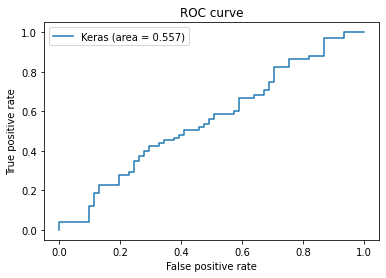

In [37]:
# accuracy results for the new model
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(testX).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(testY, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [38]:
print(roc_auc_score(testY, y_pred_keras))

0.5565027322404372
